# Nilanjan Kumar

### LinkedIn profile - https://www.linkedin.com/in/nilanjan-kumar-05057b136/

### https://dphi.tech/practice/challenge/37#problem

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv" )

In [3]:
audit_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,8,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,...,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,13,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,...,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,19,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,...,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,21,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,...,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,4,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,...,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [4]:
audit_data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [5]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 27 columns):
Sector_score      543 non-null float64
LOCATION_ID       543 non-null object
PARA_A            543 non-null float64
Score_A           543 non-null float64
Risk_A            543 non-null float64
PARA_B            543 non-null float64
Score_B           543 non-null float64
Risk_B            543 non-null float64
TOTAL             543 non-null float64
numbers           543 non-null float64
Score_B.1         543 non-null float64
Risk_C            543 non-null float64
Money_Value       543 non-null float64
Score_MV          543 non-null float64
Risk_D            543 non-null float64
District_Loss     543 non-null int64
PROB              543 non-null float64
RiSk_E            543 non-null float64
History           543 non-null int64
Prob              543 non-null float64
Risk_F            543 non-null float64
Score             543 non-null float64
Inherent_Risk     543 non-null float64
CON

In [6]:
audit_data.Risk.value_counts()

0    330
1    213
Name: Risk, dtype: int64

In [7]:
audit_data.LOCATION_ID.value_counts()

8          54
19         51
16         37
9          34
5          32
12         31
2          30
6          28
4          24
15         23
13         20
11         18
32         17
29         14
14         13
22         13
18         11
39          9
1           7
21          7
43          7
27          7
31          7
25          6
37          5
20          5
28          4
38          4
7           3
40          3
36          3
30          3
3           3
35          2
44          1
34          1
SAFIDON     1
NUH         1
41          1
23          1
33          1
17          1
Name: LOCATION_ID, dtype: int64

### Deleting non significant variables

In [8]:
audit_data = audit_data.drop(['TOTAL','LOCATION_ID'],axis = 1)

In [9]:
audit_data.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,1.13,0.4,0.452,0.00,0.2,0.000,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,8.25,0.6,4.950,1.59,0.4,0.636,5.0,0.2,1.0,...,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,2.13,0.6,1.278,0.59,0.2,0.118,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,0.42,0.2,0.084,0.00,0.2,0.000,5.0,0.2,1.0,...,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,1.33,0.4,0.532,0.35,0.2,0.070,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [10]:
audit_data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,...,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0,543.000000,543.000000
mean,20.464236,2.142874,0.346593,1.162339,9.480252,0.316022,5.538131,5.069982,0.223941,1.155617,...,0.519337,0.086556,0.212891,0.044199,2.699448,15.663949,0.563536,0.5,5.054067,0.392265
std,24.441277,4.200770,0.173158,2.558306,22.445359,0.171442,13.509523,0.281144,0.081145,0.549035,...,0.302349,0.534651,0.058735,0.309682,0.853460,43.195795,0.444976,0.0,13.394958,0.488705
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.255000,0.200000,0.051000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.582000,0.400000,0.5,0.316400,0.000000
50%,3.890000,0.840000,0.200000,0.168000,0.460000,0.200000,0.092000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.400000,0.600000,1.440000,4.500000,0.400000,2.184000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.200000,9.959000,0.400000,0.5,3.032800,1.000000
max,59.850000,57.030000,0.600000,34.218000,144.390000,0.600000,86.634000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,622.838000,5.800000,0.5,149.817600,1.000000


In [11]:
audit_data.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [12]:
X=audit_data.drop(['Risk'],axis=1)
Y = audit_data.Risk

In [13]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1,-0.272986,-0.426114,-0.273315,-0.257629,-0.236479,-0.252162,-0.156982,-0.18201,-0.176615,-0.127725,-0.331896,-0.125281,-0.0949481,-0.0905235,-0.117416,-0.107672,-0.142941,-0.0963429,-0.351501,-0.201829,-0.146831,nan,-0.208192
PARA_A,-0.272986,1,0.577962,0.998691,0.474939,0.433341,0.474203,0.152888,0.160067,0.158201,0.433996,0.324973,0.432216,0.076046,0.00639463,0.0635599,0.0691404,0.147956,0.0507299,0.48971,0.565418,0.0784927,nan,0.464311
Score_A,-0.426114,0.577962,1,0.587702,0.473553,0.582012,0.470457,0.236091,0.275002,0.264185,0.209239,0.490405,0.205699,0.0677758,0.0609777,0.0740335,0.125755,0.234719,0.101905,0.724156,0.355752,0.121224,nan,0.370496
Risk_A,-0.273315,0.998691,0.587702,1,0.480368,0.438423,0.479507,0.154994,0.163537,0.161218,0.432934,0.330126,0.431095,0.076847,0.00684745,0.0644362,0.0727027,0.152159,0.0540028,0.496775,0.566306,0.081366,nan,0.466194
PARA_B,-0.257629,0.474939,0.473553,0.480368,1,0.661852,0.999652,0.374153,0.387859,0.388774,0.306387,0.595826,0.304589,-0.0426517,0.131538,-0.00779521,0.127858,0.250115,0.0971419,0.694487,0.596853,0.0623094,nan,0.57122
Score_B,-0.236479,0.433341,0.582012,0.438423,0.661852,1,0.661983,0.298234,0.346378,0.334322,0.233326,0.57421,0.229155,-0.0279782,0.0897991,-0.0084796,0.135807,0.254292,0.108961,0.909086,0.426126,0.0700699,nan,0.404626
Risk_B,-0.252162,0.474203,0.470457,0.479507,0.999652,0.661983,1,0.372425,0.385969,0.386825,0.305885,0.591672,0.304128,-0.0416235,0.132883,-0.00634718,0.125224,0.249272,0.0944579,0.692961,0.596488,0.0614253,nan,0.571338
numbers,-0.156982,0.152888,0.236091,0.154994,0.374153,0.298234,0.372425,1,0.888832,0.947103,0.132681,0.450364,0.133065,0.0700435,0.0544072,0.0969178,0.143744,0.179903,0.144534,0.503813,0.248686,0.166441,nan,0.368509
Score_B.1,-0.18201,0.160067,0.275002,0.163537,0.387859,0.346378,0.385969,0.888832,1,0.987999,0.153951,0.524565,0.154191,0.0877514,0.0573059,0.111948,0.17329,0.229336,0.172205,0.581508,0.271599,0.195912,nan,0.421379
Risk_C,-0.176615,0.158201,0.264185,0.161218,0.388774,0.334322,0.386825,0.947103,0.987999,1,0.149034,0.507797,0.149349,0.0842998,0.0569728,0.109767,0.166474,0.216882,0.166083,0.565329,0.267847,0.190169,nan,0.412853


In [14]:
X = X.drop(['Detection_Risk'],axis = 1)

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
plt.style.use('fivethirtyeight')

In [18]:
logi = LogisticRegression()
logi.fit(X_train_scaled, y_train)

LogisticRegression()

## Cross Validation

In [19]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train_scaled, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9815789473684211

In [20]:
y_predict_logi = logi.predict(X_test_scaled)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.96319,0.981579,1.0,0.913043,0.954545,0.956522


## Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_dtc = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_dtc.mean()

0.9973684210526315

In [60]:
y_predict_dtc = dtc.predict(X_test)
acc= accuracy_score(y_test, y_predict_dtc)
roc=roc_auc_score(y_test, y_predict_dtc)
prec = precision_score(y_test, y_predict_dtc)
rec = recall_score(y_test, y_predict_dtc)
f1 = f1_score(y_test, y_predict_dtc)

results = pd.DataFrame([['Decision Tree',acc, acc_dtc.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,1.0,0.997368,1.0,1.0,1.0,1.0


## Random Forest

In [24]:
random_forest_e = RandomForestClassifier()
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [25]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

0.9973684210526315

In [26]:
y_predict_r = random_forest_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rande.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,1.0,0.997368,1.0,1.0,1.0,1.0
1,Random Forest,1.0,0.997368,1.0,1.0,1.0,1.0


In [27]:
ada_boost_e = AdaBoostClassifier()
ada_boost_e.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [28]:
acc_ada = cross_val_score(estimator = ada_boost_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_ada.mean()

0.9973684210526315

In [29]:
y_predict_r = ada_boost_e.predict(X_test_scaled)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Ada Boost',acc, acc_ada.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,1.0,0.997368,1.0,1.0,1.0,1.0
1,Random Forest,1.0,0.997368,1.0,1.0,1.0,1.0
2,Ada Boost,1.0,0.997368,1.0,1.0,1.0,1.0


## ROC curve

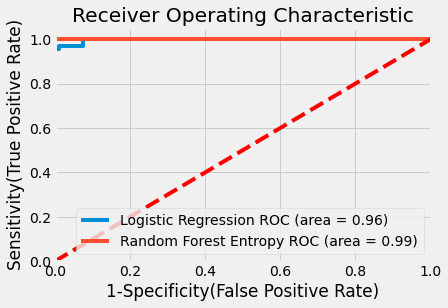

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
    {
    'label': 'Random Forest Entropy',
    'model': RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47),
},
    
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_scaled, y_train) # train the model
    y_pred=model.predict(X_test_scaled) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test_scaled))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

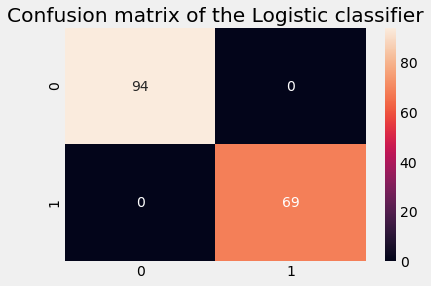

In [31]:
import seaborn as sns

cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

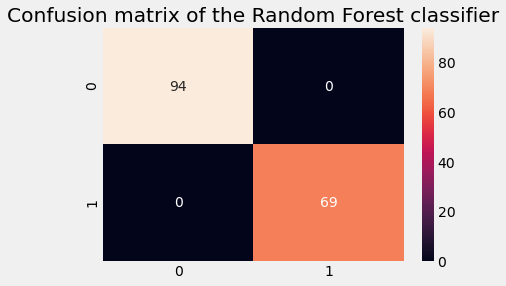

In [32]:
cm_r = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_r,annot=True,fmt="d")
plt.show()

In [33]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47))
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(criterion='entropy',
                                                 random_state=47))

In [34]:
select_X_train = sel.transform(X_train_scaled)
select_X_test = sel.transform(X_test_scaled) 

# train model
#selection_model = XGBClassifier()
selection_model1 = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
selection_model1.fit(select_X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=47)

In [35]:
rfc_prd1 = selection_model1.predict(select_X_test)

In [36]:
print(confusion_matrix(y_test, rfc_prd1 ))
print(round(accuracy_score(y_test, rfc_prd1),2)*100)

[[94  0]
 [ 0 69]]
100.0


## Working on Test data

In [37]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')

In [38]:
test_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,22,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,...,0.2,0.4,0,0.2,0.0,3.2,12.688,0.4,0.5,2.5376
1,55.57,29,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,...,0.2,0.4,0,0.2,0.0,3.0,5.136,0.4,0.5,1.0272
2,2.72,16,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.2,0.8,0,0.2,0.0,2.2,1.800,0.8,0.5,0.7200
3,59.85,4,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800
4,3.41,16,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,...,0.2,0.4,1,0.4,0.4,4.0,63.144,0.8,0.5,25.2576


In [39]:
test_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [40]:
test_data['Money_Value'].fillna((test_data['Money_Value'].median()), inplace=True)

In [41]:
test_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [42]:
test_data = test_data.drop(['TOTAL','LOCATION_ID','Detection_Risk'],axis = 1)

In [43]:
test_data.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk
0,3.89,0.00,0.2,0.000,18.05,0.6,10.830,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,3.2,12.688,0.4,2.5376
1,55.57,1.26,0.4,0.504,1.58,0.4,0.632,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,3.0,5.136,0.4,1.0272
2,2.72,0.00,0.2,0.000,0.00,0.2,0.000,5.0,0.2,1.0,...,4,0.2,0.8,0,0.2,0.0,2.2,1.800,0.8,0.7200
3,59.85,0.00,0.2,0.000,0.00,0.2,0.000,5.0,0.2,1.0,...,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.2800
4,3.41,11.73,0.6,7.038,85.87,0.6,51.522,5.0,0.2,1.0,...,2,0.2,0.4,1,0.4,0.4,4.0,63.144,0.8,25.2576


In [50]:
sc = StandardScaler()
test_data_scaled = pd.DataFrame(sc.fit_transform(test_data))

In [61]:
yprd6 = dtc.predict(test_data)

In [62]:
res = pd.DataFrame(yprd6) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission_dtc1.csv")

In [85]:
yprd2 = logi.predict(test_data_scaled)

In [86]:
res = pd.DataFrame(yprd2) #target is nothing but the final predictions of your model on input features of your new unseen test data
 
res.columns = ["prediction"]
res.to_csv("submission.csv")